In [1]:
import numpy as np
import torch.nn as nn
import torch as torch
import torch.optim as optim
import poly_fit as pf
import matplotlib as mpl
import matplotlib.pyplot as plt

<h2>Real function</h2>
The real function from which data is generated is a  linear function $a_0+a_1x$

In [2]:
def linear(x, a=1.,b=2.):
    return a*x+b

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]

Generating only 4 data points. The problem becomes worse if we were to use just two data points. 

In [4]:
x = np.array([1.,2.,3,4])
y = linear(x)
y_t = torch.from_numpy( y )

Creating a  polynomial $a_0+a_1x$

In [5]:
net = pf.PolynomialLayer(2) 
optimizer = optim.Adam(net.parameters(), lr=.01)
loss_func = nn.MSELoss() 

In [6]:
for i in range(1000):
    optimizer.zero_grad()
    y_pred  = net(x)
    loss = loss_func(y_pred, y_t)
    loss.backward()
    optimizer.step()
    if i%100 == 0 :
        print(loss)
        #net.print_weights()

tensor(1.3630, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(0.0856, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(0.0377, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(0.0126, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(0.0033, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(0.0007, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(0.0001, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(1.4525e-05, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(1.4698e-06, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(1.1559e-07, dtype=torch.float64, grad_fn=<MseLossBackward>)


In [7]:
def plot_and_compare(x,y, real_func,  net_func, xmin=0,xmax=5, ylim=None, save_file=None):
    x_net = np.arange(xmin, xmax, .1)
    y_tensor = net_func(x_net) 
    y_pred = y_tensor.data.numpy() 
    y_real = real_func(x_net)
    l1,=plt.plot(x_net, y_pred, 'r-o',markersize=1, label="Learned function")
    l2,=plt.plot(x_net, y_real, 'bo', markersize=1, label="Real function")
    l3,=plt.plot(x,y,'gx', label="Learning data")
    plt.legend(handles=[l1,l2,l3])
    if not (ylim is None):
        plt.ylim(ylim)
    if not (save_file is None):
        plt.savefig(save_file, dpi=150)

Parameter containing:
tensor([[1.9998, 1.0001]], requires_grad=True)


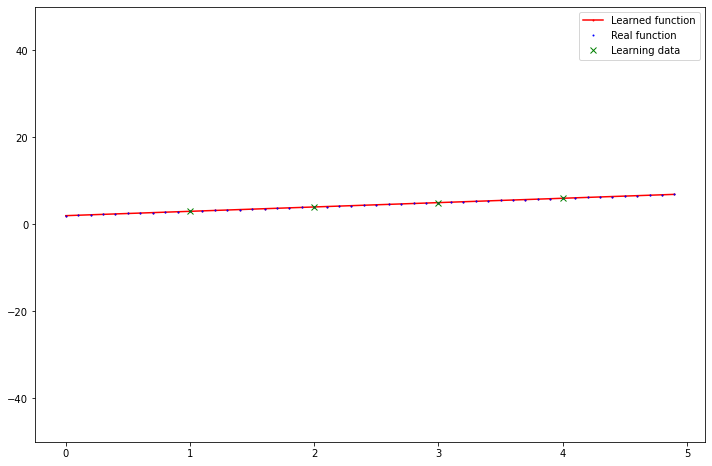

In [8]:
plot_and_compare(x,y,linear,  net, ylim=(-50,50), save_file='linear_eg1.png')
net.print_weights() 

<h1>Higher order polynomial</h1>
Let us create data first 

In [ ]:
x = np.array([1.,2.,3,4])
y = linear(x)
y_t = torch.from_numpy( y )

Here, the function is $a_0+a_1x+a_2x^2+\dots +a_9x^9$ and we need to find the values of 
$a_0, a_1, \dots a_9$

In [ ]:
net = pf.PolynomialLayer(10) 
optimizer = optim.Adam(net.parameters(), lr=.01)
loss_func = nn.MSELoss() 

In [ ]:
for i in range(100000):
    optimizer.zero_grad()
    y_pred  = net(x)
    loss = loss_func(y_pred, y_t)
    loss.backward()
    optimizer.step()
    if i%10000 == 0 :
        print(loss)
        #net.print_weights()

In [ ]:
ylim=(-20,50)
plot_and_compare(x,y,linear,  net, -5,5, ylim=ylim, save_file="linear_w_degree_9.png")
net.print_weights() 

<h1>Making it worse!</h1>

In [ ]:
x = np.array([-4,4])
y = linear(x)
y_t = torch.from_numpy( y )

In [ ]:
net = pf.PolynomialLayer(10) 
optimizer = optim.Adam(net.parameters(), lr=.01)
loss_func = nn.MSELoss() 

In [ ]:
for i in range(10000):
    optimizer.zero_grad()
    y_pred  = net(x)
    loss = loss_func(y_pred, y_t)
    loss.backward()
    optimizer.step()
    if i%1000 == 0 :
        print(loss)
        #net.print_weights()

In [ ]:
ylim=(-1500,1500)
plot_and_compare(x,y,linear,  net, -5,5, ylim=ylim, save_file='linear_w_degree_9_2points_only.png')
net.print_weights() 

<h1>Estimating quadratics</h1>

Original data from $1-2x+4x^2$

In [10]:
def quad(x, a=1., b=-2., c=4):
    return a-b*x+c*np.square(x)

In [ ]:
x = np.array([-4.,4, 2])
y = quad(x)
y_t = torch.from_numpy( y )
net = pf.PolynomialLayer(3) 
optimizer = optim.Adam(net.parameters(), lr=.01)
loss_func = nn.MSELoss()

In [ ]:
losses=[] 
each_n = 1000
for i in range(10000):
    optimizer.zero_grad()
    y_pred  = net(x)
    loss = loss_func(y_pred, y_t)
    losses.append(loss) 
    loss.backward()
    optimizer.step()
    if i%each_n == 0 :
        loss_n = losses[each_n:]
        if loss_n:
            print(torch.mean(torch.Tensor(loss_n)).data)
        #net.print_weights()

In [ ]:
plot_and_compare(x,y,quad,  net, -5,5, save_file='quad_w_degree_2.png')
net.print_weights() 

In [ ]:
x = np.array([-4.,4, 2])
y = quad(x)
y_t = torch.from_numpy( y )
net = pf.PolynomialLayer(10) 
optimizer = optim.Adam(net.parameters(), lr=.01)
loss_func = nn.MSELoss()

In [ ]:
losses=[] 
each_n = 1000
for i in range(each_n*10):
    optimizer.zero_grad()
    y_pred  = net(x)
    loss = loss_func(y_pred, y_t)
    losses.append(loss) 
    loss.backward()
    optimizer.step()
    if i%each_n == 0 :
        loss_n = losses[each_n:]
        if loss_n:
            print(torch.mean(torch.Tensor(loss_n)).data)
        #net.print_weights()

In [ ]:
ylim=(-300,300)
plot_and_compare(x,y,quad,  net, -5,5,ylim=ylim, save_file='quad_w_degree_9.png')
net.print_weights() 

In [ ]:
plt.plot(x,y,'go')
plt.plot(np.arange(-4,4,.1), quad(np.arange(-4,4,.1)), 'ro',markersize=1)

In [45]:
x = np.array([-4.,-2,0,2,4])
y = quad(x)
y_t = torch.from_numpy( y )
net = pf.PolynomialLayer(10) 
optimizer = optim.Adam(net.parameters(), lr=.01)
loss_func = nn.MSELoss()

In [47]:
losses=[] 
each_n = 1000
for i in range(each_n*10):
    optimizer.zero_grad()
    y_pred  = net(x)
    loss = loss_func(y_pred, y_t)
    losses.append(loss) 
    loss.backward()
    optimizer.step()
    if i%each_n == 0 :
        loss_n = losses[each_n:]
        if loss_n:
            print(torch.mean(torch.Tensor(loss_n)).data)

tensor(1.0075e-05)
tensor(8805.8965)
tensor(4480.3882)
tensor(3640.0933)
tensor(3397.6489)
tensor(3177.9592)
tensor(3779.0405)
tensor(3375.5212)
tensor(3268.1804)


Parameter containing:
tensor([[ 1.0012e+00, -3.6836e+01,  2.0611e+00, -9.0698e+00,  8.7622e-01,
         -6.7733e-01, -1.1479e-01,  1.7616e+00,  4.2254e-03, -1.0465e-01]],
       requires_grad=True)


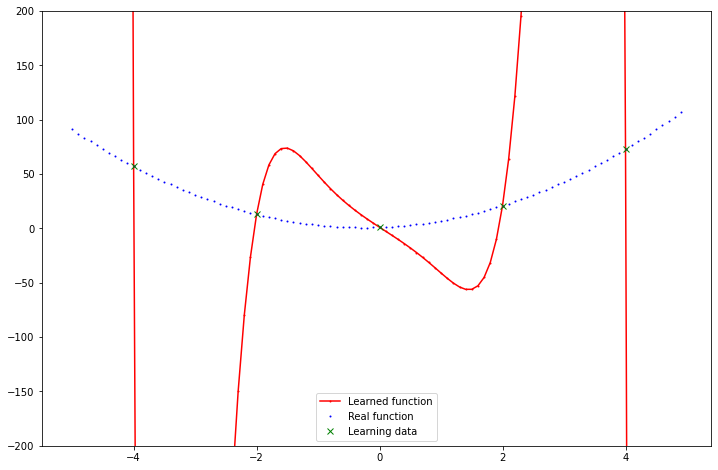

In [48]:
ylim=(-200,200)
plot_and_compare(x,y,quad,  net, -5,5,ylim=ylim, save_file='quad_w_degree_9_5points.png')
net.print_weights() 